# Practical 03: Implement Logistic Regeression for classification of handwritten digits (MNIST dataset)

In [2]:
import pandas as pd

#**Data Collection**

In [3]:
iris_data = pd.read_csv('/content/drive/MyDrive/MSC CS/SEM 3/1. Machine Learning & Deep Learning/Practicals/3. Logistic Regression/Iris.csv')

In [4]:
#print(iris_data)
#iris_data.sample(5)
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#**Data Cleaning**

In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#**Label Encoding**

In [6]:
# Iris-setosa = 0 , Iris-versicolor = 1, Iris-virginica = 2

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

iris_data['Species'] = encoder.fit_transform(iris_data['Species'])

In [7]:
iris_data.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


#**Data Analysis**

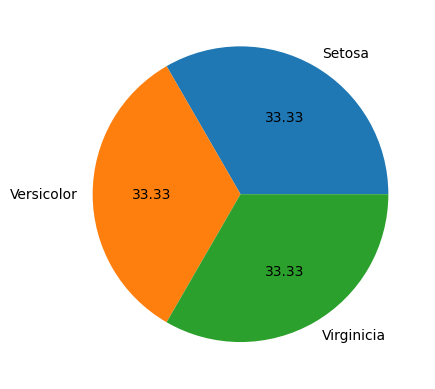

In [8]:
import matplotlib.pyplot as plt

plt.pie(iris_data['Species'].value_counts(),labels = ['Setosa', 'Versicolor', 'Virginicia'], autopct = '%0.2f')
plt.show()

#**Create Dependent & Independent Variable**

In [9]:
x = iris_data.drop('Species',axis = 1)
y = iris_data['Species']

In [10]:
print(x)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]


In [11]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


#**Split data into Train and Test dataset**

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

#**Train the model**

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)
model.fit(x_train,y_train)
LogisticRegression(max_iter=1000)

LogisticRegression(max_iter=1000)

#**Predict train data**

In [14]:
pred_train = model.predict(x_train)

#**Check accuracy on train data**

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_train,pred_train)

1.0

#**Predict Test data**

In [16]:
pred_test = model.predict(x_test)

#**Check accuracy and print Confusion matrix**

In [17]:
accuracy_score(y_test, pred_test)

1.0

In [20]:
confusion_matrix(y_test,pred_test)

array([[14,  0,  0],
       [ 0,  8,  0],
       [ 0,  0,  8]])